In [93]:
import json
import pandas as pd
import numpy as np
from unidecode import unidecode
from sklearn.model_selection import train_test_split
import seaborn as sns

In [94]:
f = open("data/uit_member.json")
data = json.load(f)
len(data)

8757

In [95]:
first_name =[]
last_name =[]
full_name =[]
label = []
for i in data:
    last_name.append(unidecode(i["last_name"]).lower())
    first_name.append(unidecode(i["first_name"]).lower())
    full_name.append(unidecode(i["full_name"]).lower())
    label.append(1)
print("Done")
print(last_name[0:5])
print(first_name[0:5])
print(full_name[0:5])

Done
['nguyen thi nhu', 'le hoang', 'dinh van', 'nguyen echam', 'nguyen xuan']
['quynh', 'quan', 'phuong', 'samuel', 'sang']
['nguyen thi nhu quynh', 'le hoang quan', 'dinh van phuong', 'nguyen echam samuel', 'nguyen xuan sang']


In [96]:
dfhodantoc = pd.read_excel('./ho_dantoc.xlsx',header=None)
dfhodantoc = np.asarray(dfhodantoc)

In [97]:
first_name_dan_toc = []

In [98]:
for ho in dfhodantoc:
    for mid in last_name:
        first_name_dan_toc.append(unidecode(ho[0]+' '+mid.split(' ')[-1]))

In [99]:
first_name_dan_toc[-1]

'Li manh'

In [100]:
for hodantoc in first_name_dan_toc:
    last_name.append(hodantoc)

In [101]:
sample_number = 100
full_name_aug = []
label_aug = []
for i in last_name[0:sample_number]:
    for j in first_name[0:sample_number]:
        full_name_aug.append(i+" "+j)
        label_aug.append(1)
print("Done")
print(full_name_aug[0:5])
print(len(full_name_aug))

Done
['nguyen thi nhu quynh', 'nguyen thi nhu quan', 'nguyen thi nhu phuong', 'nguyen thi nhu samuel', 'nguyen thi nhu sang']
10000


In [102]:
df_aug =  pd.DataFrame([full_name_aug, label_aug])
df_aug = df_aug.transpose()
df_aug.columns = ["name", "label"]
df_aug.head()

,name,label
0,nguyen thi nhu quynh,1
1,nguyen thi nhu quan,1
2,nguyen thi nhu phuong,1
3,nguyen thi nhu samuel,1
4,nguyen thi nhu sang,1


In [103]:
# Convert to dataframe and labeling
df1 = pd.DataFrame([full_name, label])
df1 = df1.transpose()
df1.columns = ["name", "label"]
df1.head()

,name,label
0,nguyen thi nhu quynh,1
1,le hoang quan,1
2,dinh van phuong,1
3,nguyen echam samuel,1
4,nguyen xuan sang,1


In [104]:
df2 = pd.read_excel("data/vip.xlsx")
df2.head()

,name,label
0,CHI NHáNH CôNG TY TNHH TậP ĐOàN ĐầU Tư HOA SEN...,0.0
1,Chi Nhánh Công Ty Cổ Phần Thương Mại Dịch Vụ K...,0.0
2,Công ty Cổ phần Công nghệ Y Sinh học và Thực p...,0.0
3,Hợp tác xã cơ khí Phương Nam,0.0
4,HTX khai thác cá biển bắc hải,0.0


In [105]:
full_name2 =[]
label2 = []
for i in df2["name"]:
    full_name2.append(unidecode(i).lower())
    label2.append(0)
print("Done")
print(full_name2[0:5])

Done
['chi nhanh cong ty tnhh tap doan dau tu hoa sen tai son dong', 'chi nhanh cong ty co phan thuong mai dich vu ket noi viet', 'cong ty co phan cong nghe y sinh hoc va thuc pham dinh duong viet nam', 'hop tac xa co khi phuong nam', 'htx khai thac ca bien bac hai']


In [106]:
# Convert to dataframe and labeling
df2 = pd.DataFrame([full_name2, label2])
df2 = df2.transpose()
df2.columns = ["name", "label"]
df2.head()

,name,label
0,chi nhanh cong ty tnhh tap doan dau tu hoa sen...,0
1,chi nhanh cong ty co phan thuong mai dich vu k...,0
2,cong ty co phan cong nghe y sinh hoc va thuc p...,0
3,hop tac xa co khi phuong nam,0
4,htx khai thac ca bien bac hai,0


In [107]:
df3 = pd.read_excel("data/vip2.xlsx")
df3.head()

,name,label
0,VPĐD Teledata Informatics Limited,0.0
1,Hợp tác xã: dịch vụ điện năng xã Hạ Bì,0.0
2,Phong kham da khoa Trường Thọ,0.0
3,Phong kham da khoa An Phước,0.0
4,Cty TNHH Một Thành Viên Nam Việt Vĩnh Kim,0.0


In [108]:
full_name3 =[]
label3 = []
for i in df3["name"]:
    full_name3.append(unidecode(i).lower())
    label3.append(0)
print("Done")
print(full_name3[0:5])

Done
['vpdd teledata informatics limited', 'hop tac xa: dich vu dien nang xa ha bi', 'phong kham da khoa truong tho', 'phong kham da khoa an phuoc', 'cty tnhh mot thanh vien nam viet vinh kim']


In [109]:
# Convert to dataframe and labeling
df3 = pd.DataFrame([full_name3, label3])
df3 = df3.transpose()
df3.columns = ["name", "label"]
df3.head()

,name,label
0,vpdd teledata informatics limited,0
1,hop tac xa: dich vu dien nang xa ha bi,0
2,phong kham da khoa truong tho,0
3,phong kham da khoa an phuoc,0
4,cty tnhh mot thanh vien nam viet vinh kim,0


In [110]:
# sinh dữ liệu
tien_to = ["ch ", "cn ", "cb ", "dgd ", "dgd ","dt ", "dl ", "dtb ", "pk ", "dccdvvtld ", "cafe",
           "ch", "cn","cb", "dgd", "dgd","dt", "dl", "dtb", "pk", "dccdvvtld",
           "ho kinh doanh ", "cua hang ", "noi that ", "dien thoai ",
           "phong kham ", "phong kham da khoa ", "hoi dong huong ","nha khoa ", "quan ruou ","tap hoa "
           "truong ", "truong dai hoc ", "co so ", "co so thu mua","ho kinh ", "quay thuoc ","group", "cty ", "tt ", "cs ","chi nhanh "]

In [111]:
boy_names = pd.read_csv("data/boy.txt", delimiter = "\t",  header=None)
girl_names = pd.read_csv("data/girl.txt", delimiter = "\t",  header=None)
print(boy_names.head())
print(girl_names.head())

           0
0      An Cơ
1   An Khang
2     Ân Lai
3     An Nam
4  An Nguyên
            0
0  Phương Chi
1     An Bình
2       An Di
3       An Hạ
4     An Hằng


In [112]:
# Sinh dữ liệu tên non person
gen_data = []
label_gen = []
no_samples = 100
for i in range(len(tien_to)):
    # Các trường hợp ngoại lệ
    gen_data.append("khong su dung")
    label_gen.append(0) 
    gen_data.append("keu")
    label_gen.append(0)
    for j in range(no_samples):
        # trường hợp tiền tố + tên đệm và tên
        gen_data.append(tien_to[i] + unidecode(boy_names[0][j]).lower())
        label_gen.append(0)
        gen_data.append(tien_to[i] + unidecode(girl_names[0][j]).lower())
        label_gen.append(0)
        # trường hợp tiền tố + full name
        gen_data.append(tien_to[i] + full_name[j].split()[0] + " " + unidecode(boy_names[0][j]).lower())
        label_gen.append(0) 
        gen_data.append(tien_to[i] + full_name[j].split()[0] + " " + unidecode(girl_names[0][j]).lower())
        label_gen.append(0) 
        gen_data.append(tien_to[i] + full_name[j])
        label_gen.append(0) 
        # trường hợp tiền tố + tên
        gen_data.append(tien_to[i] + first_name[j])
        label_gen.append(0) 
        # trường hợp chỉ có tên
        gen_data.append(first_name[j])
        label_gen.append(0) 
print(len(gen_data))

28782


In [113]:
df_gen = pd.DataFrame([gen_data, label_gen])
df_gen = df_gen.transpose()
df_gen.columns = ["name", "label"]
df_gen.head(10)

,name,label
0,khong su dung,0
1,keu,0
2,ch an co,0
3,ch phuong chi,0
4,ch nguyen an co,0
5,ch nguyen phuong chi,0
6,ch nguyen thi nhu quynh,0
7,ch quynh,0
8,quynh,0
9,ch an khang,0


In [114]:
df_gan = pd.read_excel('ten_nguoidt.xlsx')

In [115]:
df_gan

,name,label
0,DƯƠNG THỊ MIÊN,1
1,MÔNG TIẾN NHÂM,1
2,AN MINH KHÔI,1
3,BẠCH CÔNG DŨNG,1
4,BẠCH CÔNG TẠO,1
...,...,...
15266,VƯƠNG THU HẰNG,1
15267,VƯƠNG THU TRANG,1
15268,VƯƠNG VĂN HẢI,1
15269,VƯƠNG VĂN HÙNG,1


In [124]:
full_name4 =[]
label4 = []
for i in df_gan["name"]:
    i = i.strip()
    full_name4.append(unidecode(i).lower())
    label4.append(1)
print("Done")
print(full_name4[0:5])

Done
['duong thi mien', 'mong tien nham', 'an minh khoi', 'bach cong dung', 'bach cong tao']


In [125]:
df_dantoc = pd.DataFrame([full_name4, label4])
df_dantoc = df_dantoc.transpose()
df_dantoc.columns = ["name", "label"]
df_dantoc.head(10)

,name,label
0,duong thi mien,1
1,mong tien nham,1
2,an minh khoi,1
3,bach cong dung,1
4,bach cong tao,1
5,bach quang tuyen,1
6,bach thi mai,1
7,bach thi thao,1
8,bach thi tuyet nhung,1
9,ban thi tinh,1


In [126]:
X = pd.concat([df_aug, df1, df2, df3, df_gen,df_dantoc],ignore_index=True)
X.tail()

,name,label
71977,vuong thu hang,1
71978,vuong thu trang,1
71979,vuong van hai,1
71980,vuong van hung,1
71981,xa thi minh hoa,1


In [127]:
data_train, data_test = train_test_split(X, test_size=0.2, random_state=102, stratify = X["label"])
print(f'X_train: {data_train.shape}, X_test: {data_test.shape}')

X_train: (57585, 2), X_test: (14397, 2)


c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    30363
1    27222
Name: label, dtype: int64

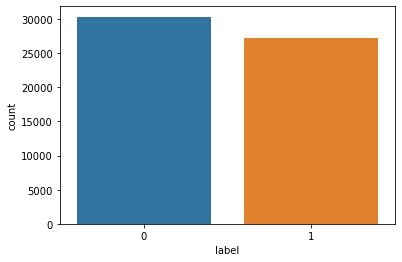

In [128]:
# Distribution of the Target variable.
sns.countplot(data_train["label"])
data_train["label"].value_counts()

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    7591
1    6806
Name: label, dtype: int64

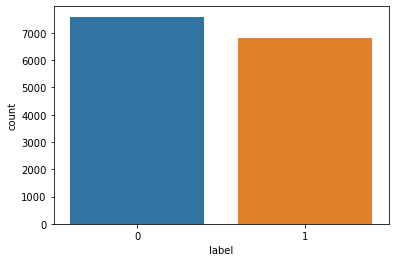

In [129]:
# Distribution of the Target variable.
sns.countplot(data_test["label"])
data_test["label"].value_counts()

In [130]:
data_train.to_csv("data_train_moredata4.csv")
data_test.to_csv("data_test_moredata4.csv")

In [131]:
f = open('./fullname.txt',encoding='utf-8')
lines = f.readlines()

In [133]:
full_name =[]
label = []
for i in lines:
    i = i.strip()
    full_name.append(unidecode(i).lower())
    label.append(1)
print("Done")
print(full_name[0:5])    

Done
['nguyen kim truc', 'nguyen kim kim', 'nguyen kim tuy', 'nguyen kim vinh', 'nguyen kim ca']


In [135]:
df_full_name = pd.DataFrame([full_name, label])
df_full_name = df_full_name.transpose()
df_full_name.columns = ["name", "label"]
df_full_name.head(10)